In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_dindang.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)
df 

,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
date,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0


In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pm10,1698.0,67.79,24.90,1.00,49.00,63.00,81.00,205.00
co,1714.0,1.22,4.93,0.00,0.54,0.74,1.20,123.48
no,1713.0,35.27,20.58,0.29,18.53,32.00,48.70,140.80
no2,1713.0,24.31,14.24,1.19,15.19,21.07,29.93,119.00
nox,1712.0,55.67,27.92,2.16,35.29,51.90,73.19,176.92
pm25,1028.0,23.18,13.58,4.00,14.00,19.00,29.00,139.00
avgT,1695.0,30.24,1.76,16.60,29.30,30.30,31.30,35.10
humid,1765.0,73.93,8.26,32.00,69.00,74.00,79.00,97.00
pressure-monthly,1765.0,1008.48,2.13,1004.94,1006.53,1008.20,1010.15,1012.61
windDir,1735.0,188.91,85.55,0.00,120.00,190.00,250.00,360.00


In [5]:
dd = df.drop(['pm10', 'no','no2', 'nox', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

,pm25
date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN


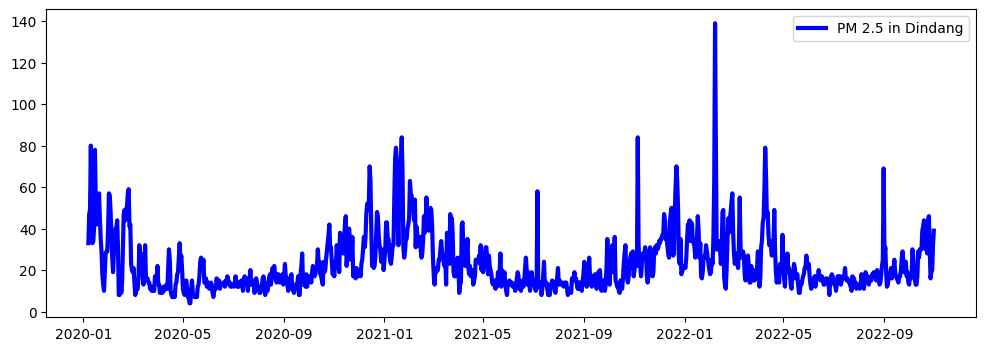

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Dindang')
plt.legend()
plt.show()

In [7]:
y_col='pm25'

In [8]:
df.dropna(subset=[y_col], inplace=True)
df = df.reset_index(drop=True)
df

,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0
1,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0
2,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0
3,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0
4,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
1023,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0
1024,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0
1025,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0
1026,80.0,0.90,35.39,38.30,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1027 non-null   float64
 1   co                1028 non-null   float64
 2   no                1027 non-null   float64
 3   no2               1027 non-null   float64
 4   nox               1026 non-null   float64
 5   pm25              1028 non-null   float64
 6   avgT              1016 non-null   float64
 7   humid             1028 non-null   int64  
 8   pressure-monthly  1028 non-null   float64
 9   windDir           1016 non-null   float64
 10  windSpd           1016 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 88.5 KB


(1028, 11)

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.68137255, 0.01045564, 0.15208882, 0.27791943, 0.29203803,
        0.21481481, 0.69827586, 0.32      , 0.80212483, 0.30555556,
        0.1       ],
       [0.57352941, 0.00892086, 0.18439969, 0.25514193, 0.3030303 ,
        0.31851852, 0.67241379, 0.44      , 0.80212483, 0.33333333,
        0.25      ],
       [0.66666667, 0.01314149, 0.52252509, 0.35347612, 0.652347  ,
        0.33333333, 0.69827586, 0.42      , 0.80212483, 0.66666667,
        0.2       ],
       [0.89215686, 0.01390887, 0.40737314, 0.45877953, 0.63161022,
        0.56296296, 0.68103448, 0.44      , 0.80212483, 0.33333333,
        0.2       ],
       [0.59803922, 0.00642686, 0.04626005, 0.21570627, 0.16019014,
        0.28888889, 0.61206897, 0.66      , 0.80212483, 0.44444444,
        0.5       ],
       [0.5245098 , 0.0053717 , 0.04348445, 0.17219106, 0.12739156,
        0.21481481, 0.67241379, 0.66      , 0.80212483, 0.44444444,
        0.05      ],
       [0.50490196, 1.        , 0.12796242, 0.20499745, 0.

In [11]:
n_train = int(df.shape[0] * 0.80)
n_train

822

In [12]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [13]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((822, 11), (206, 11))

In [14]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel() 

Epoch 1/60
4/4 [==============================] - 2s 216ms/step - loss: 821.3129 - val_loss: 425.3861
Epoch 2/60
4/4 [==============================] - 0s 24ms/step - loss: 752.8084 - val_loss: 383.8468
Epoch 3/60
4/4 [==============================] - 0s 25ms/step - loss: 687.5836 - val_loss: 341.1465
Epoch 4/60
4/4 [==============================] - 0s 30ms/step - loss: 618.0725 - val_loss: 292.1393
Epoch 5/60
4/4 [==============================] - 0s 74ms/step - loss: 532.7004 - val_loss: 227.9923
Epoch 6/60
4/4 [==============================] - 0s 44ms/step - loss: 413.9824 - val_loss: 140.8784
Epoch 7/60
4/4 [==============================] - 0s 24ms/step - loss: 257.1100 - val_loss: 67.1945
Epoch 8/60
4/4 [==============================] - 0s 23ms/step - loss: 172.4590 - val_loss: 76.1038
Epoch 9/60
4/4 [==============================] - 0s 23ms/step - loss: 172.4938 - val_loss: 59.8593
Epoch 10/60
4/4 [==============================] - 0s 26ms/step - loss: 129.9062 - val_loss: 

In [ ]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

5/5 [==============================] - 0s 7ms/step


In [ ]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
4/4 [==============================] - 5s 190ms/step - loss: 3341.5447
Epoch 2/10
4/4 [==============================] - 1s 212ms/step - loss: 784.6611
Epoch 3/10
4/4 [==============================] - 1s 335ms/step - loss: 783.8027
Epoch 4/10
4/4 [==============================] - 1s 279ms/step - loss: 533.5700
Epoch 5/10
4/4 [==============================] - 1s 245ms/step - loss: 371.4689
Epoch 6/10
4/4 [==============================] - 1s 275ms/step - loss: 334.9680
Epoch 7/10
4/4 [==============================] - 1s 319ms/step - loss: 242.6017
Epoch 8/10
4/4 [==============================] - 1s 264ms/step - loss: 219.4406
Epoch 9/10
4/4 [==============================] - 1s 205ms/step - loss: 216.0742
Epoch 10/10
1/1 [==============================] - 0s 27ms/step


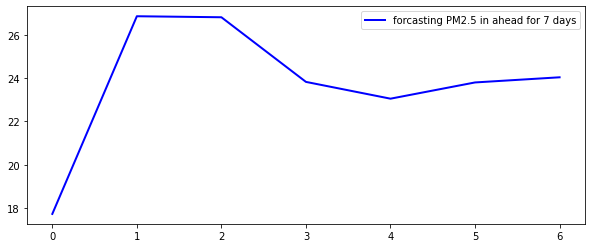

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

,พยากรณ์ PM2.5
0,17.729973
1,26.853773
2,26.806927
3,23.823902
4,23.048876
5,23.798197
6,24.035711


In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,18.0
1,27.0
2,27.0
3,24.0
4,23.0
5,24.0
6,24.0


In [ ]:
ypred.mean().round(0)

พยากรณ์ PM2.5    24.0
dtype: float32

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypred,yhat)
p_mse = mse*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 2.956762909889221
RMSE 1.7195240358567894
